In [34]:
import numpy as np
import pandas as pd
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

In [68]:
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [36]:
df=pd.read_csv("../master/restaurante.csv", encoding='cp949')
df

,시도,시군구,업태,주메뉴,업소명,주소,전화번호
0,경남,창원시,한식,"낙지전골, 낙지복음",낙지천하,의창구 북면 신촌 본포로32,055-255-0885
1,경남,창원시,한식,감자탕,통뼈감자탕북면감계점,의창구 북면 감계로110번길58,055-231-0188
2,경남,창원시,한식,"추어탕,다슬기탕",가마솥추어탕,의창구 북면 천주로 1019-22 (1층),055-298-3555
3,경남,창원시,한식,전골류,가야골뚝배기,"의창구 의창대로54번길 5-13 (팔용동,코코빌딩1층101호)",055-255-3777
4,경남,창원시,한식,"어탕국수,메기매운탕",경호강메기탕,의창구 창이대로85번길 5 (명서동),055-283-7669
...,...,...,...,...,...,...,...
1129,경남,합천군,한식,삼겹살,옥산식육식당,합천읍 옥산로 43-9,055-933-0304
1130,경남,합천군,한식,삼겹살,부자돼지,합천읍 옥산로 84,055-931-5885
1131,경남,합천군,한식,메기매운탕,약천메기탕,합천읍 충효로 113,055-933-8253
1132,경남,합천군,중식,탕수육,비룡요리왕,삼가면 삼가로 161,055-933-3296


In [37]:
df4=df.loc[:,'주메뉴':'업소명']
df4

,주메뉴,업소명
0,"낙지전골, 낙지복음",낙지천하
1,감자탕,통뼈감자탕북면감계점
2,"추어탕,다슬기탕",가마솥추어탕
3,전골류,가야골뚝배기
4,"어탕국수,메기매운탕",경호강메기탕
...,...,...
1129,삼겹살,옥산식육식당
1130,삼겹살,부자돼지
1131,메기매운탕,약천메기탕
1132,탕수육,비룡요리왕


In [56]:
# split(): 구분자를 기준으로 n개로 나눈다, expand=True이면 여러 컬럼, False이면 1개 컬럼에 리스트

# df5['sum']=df5.iloc[0:3].apply(sum,axis=1)
# sortedf=df6.sort_values(by=df6.iloc[0], ascending=False)

In [63]:
df5 = df4['주메뉴'].str.split(',', n=3, expand=True)
df5 = df5.apply(pd.value_counts).fillna(0).astype(int)
df6 = pd.DataFrame(df5.apply(sum,axis=1))

In [66]:
df6.columns=['건수']
df6

,건수
,1
가브리살,1
갈매기조개),1
갈비찜,2
갈비탕,8
...,...
훈제오리,1
훈제요리(삼겹,1
흑돼지 국밥,1
흑염소구이,1


In [75]:
df_sorted_by_values = df6.sort_values(by='건수' ,ascending=False)
sorted=df_sorted_by_values.head(5)

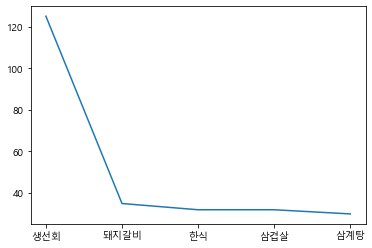

In [76]:
plt.plot(sorted)
plt.show()

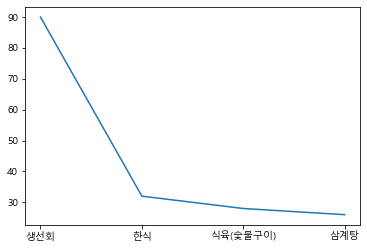

In [39]:
df2=df.groupby(by='주메뉴').size().reset_index(name='건수')
df3=df2.sort_values(by='건수',ascending=False).head(4)
plt.plot(df3['주메뉴'],df3['건수'])
plt.show()